# IBM Python Data Science Professional Certificate Capstone Project
## Predicting Top Complaint Type in New York City with KNN , Logistic Regression and SVM Model

In [38]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
import itertools
import warnings

%matplotlib inline 

In [39]:
# For better readabiliy,
warnings.filterwarnings('ignore')

The dataset(NYC_311) was provided by IBM and the source of the dataset is from the Department of Housing Preservation and Development of New York City. Apart from the NYC_311 dataset. Five different datasets than contains information of five Borough are also used in this project.

In [40]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [41]:
# Insert the five datasets of PLUTO

body = client_dac1daeec7b44514b3970d8c1312c2cf.get_object(Bucket='edxibmdatasciencecapstone-donotdelete-pr-w0j6fxaxrio31w',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_BK = pd.read_csv(body)
df_BK.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


In [42]:
body = client_dac1daeec7b44514b3970d8c1312c2cf.get_object(Bucket='edxibmdatasciencecapstone-donotdelete-pr-w0j6fxaxrio31w',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_BX = pd.read_csv(body)
df_BX.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [43]:

body = client_dac1daeec7b44514b3970d8c1312c2cf.get_object(Bucket='edxibmdatasciencecapstone-donotdelete-pr-w0j6fxaxrio31w',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_MN = pd.read_csv(body)
df_MN.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


In [44]:

body = client_dac1daeec7b44514b3970d8c1312c2cf.get_object(Bucket='edxibmdatasciencecapstone-donotdelete-pr-w0j6fxaxrio31w',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_QN = pd.read_csv(body)
df_QN.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


In [45]:
body = client_dac1daeec7b44514b3970d8c1312c2cf.get_object(Bucket='edxibmdatasciencecapstone-donotdelete-pr-w0j6fxaxrio31w',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_SI = pd.read_csv(body)
df_SI.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.0,2000.0,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
1,SI,1,17,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
2,SI,1,18,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
3,SI,1,19,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
4,SI,1,21,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1


## Data Exploration

In [46]:
# Reanme columns
df_311 = df_311.rename(columns={'Complaint Type': 'Complaint_Type','Incident Zip': 'Incident_Zip','Incident Address':'Incident_Address'})

In [47]:
#Exploring the dataset
# Complaints logged start date
df_311['Created Date'].min()

'01/01/2010 02:31:13 PM'

In [48]:
# NAs
df_311.isna().sum()

Unnamed: 0                     0
Unique Key                     0
Created Date                   0
Closed Date               126657
Complaint_Type                 0
Location Type              52824
Incident_Zip               80697
Incident_Address           52825
Street Name                52825
Address Type               84765
City                       80274
Status                         0
Resolution Description      7826
Borough                        0
Latitude                   80671
Longitude                  80671
dtype: int64

In [49]:
# The size of NYC 311 dataset
df_311.shape

(6019843, 16)

In [50]:
# Number of Unique Zipcode in Bronx PLUTO dataset
df_BX['ZipCode'].nunique()

26

In [51]:
# Number of Unique Zipcode in Queens PLUTO dataset
df_QN['ZipCode'].nunique()

65

In [52]:
#Number of different camplaints inside the dataset
df_311['Complaint_Type'].nunique()

30

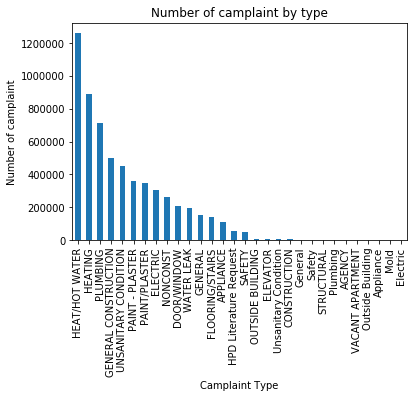

In [53]:
# Check number of camplaint type
complaint = df_311['Complaint_Type'].value_counts()
complaint.plot(kind='bar')
plt.title('Number of camplaint by type')
plt.ylabel('Number of camplaint')
plt.xlabel('Camplaint Type')
plt.show()

FHeat/hot water and Heating are having largest number of camplaint. The following will be focused on studying these two top camplaints

In [54]:
# Define New Dataframe
df_311_2 = df_311[(df_311.Complaint_Type == "HEAT/HOT WATER")|(df_311.Complaint_Type == "HEATING")]

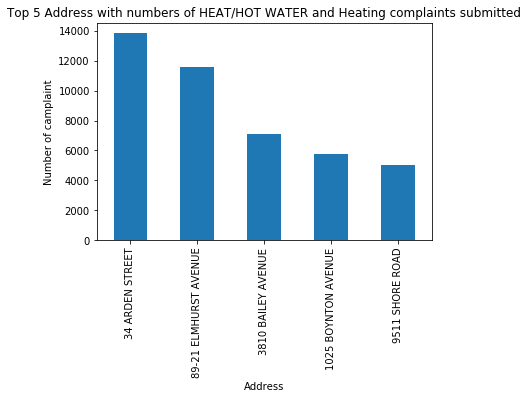

In [55]:
# Top 5 Address that had the highest number of HEAT/HOT WATER and HEATING complaints submitted
Zipcode = df_311_2['Incident_Address'].value_counts().head()
Zipcode.plot(kind='bar')
plt.title('Top 5 Address with numbers of HEAT/HOT WATER and Heating complaints submitted')
plt.ylabel('Number of camplaint')
plt.xlabel('Address')
plt.show()

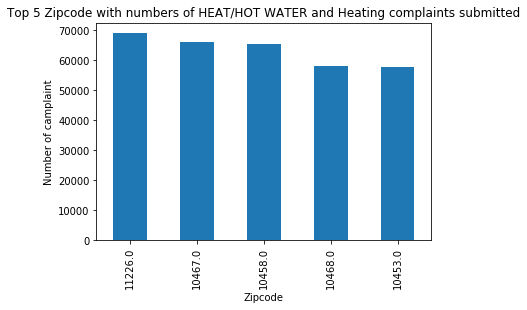

In [56]:
# Top 5 Zipcode that had the highest number of HEAT/HOT WATER and HEATING complaints submitted
Address = df_311_2['Incident_Zip'].value_counts().head()
Address.plot(kind='bar')
plt.title('Top 5 Zipcode with numbers of HEAT/HOT WATER and Heating complaints submitted')
plt.ylabel('Number of camplaint')
plt.xlabel('Zipcode')
plt.show()

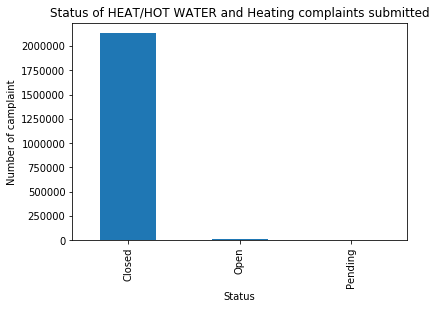

In [57]:
# Status of the HEAT/HOT WATER and HEATING tickest
Status = df_311_2['Status'].value_counts()
Status.plot(kind='bar')
plt.title('Status of HEAT/HOT WATER and Heating complaints submitted')
plt.ylabel('Number of camplaint')
plt.xlabel('Status')
plt.show()

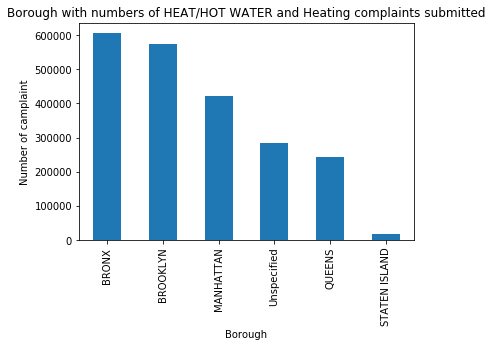

In [58]:
# borough that had the highest HEAT/HOT WATER and Heating complaints submitted
Borough = df_311_2['Borough'].value_counts()
Borough.plot(kind='bar')
plt.title('Borough with numbers of HEAT/HOT WATER and Heating complaints submitted')
plt.ylabel('Number of camplaint')
plt.xlabel('Borough')
plt.show()

The Bronx Borough is having the largest number of these two top camplaints. The prediction and anlysis will focus on this Borough. 

## Problem Statment

Can a predictive model be built for future prediction of the possibility of complaints of HEAT/HOT WATER & Heating?

The Borough with highest number of Heating and HEAT/HOT WATER are chosen

In [59]:
# Some features are chosen from the dataset
df_BX_New = df_BX[['Address','BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors','OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_BX_New.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


Since the dataset is a bit too large, to avoid too long computing time, a subset of random 10,000 rows are used for model building. 

In [60]:
# Join the two dataset
df_BX_New.rename(columns={'Address':'Street Name'}, inplace=True)
random_311 = df_311_2.sample(n=10000, replace = False, random_state = 2)
df_311_join = pd.merge(random_311,df_BX_New,on='Street Name',how='left')

In [61]:
df_311_join = df_311_join.dropna()
df_311_join['Complaint_Type'].value_counts()
# Make Sure number of the dataset contains enough in both Heating and HEAT/HOT WATER camplaints

HEAT/HOT WATER    3886
HEATING           2906
Name: Complaint_Type, dtype: int64

In [62]:
# Define Feature
X = df_311_join[['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors','OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']].values
y = df_311_join[['Complaint_Type']].values

# Preprocessing: Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [63]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5433, 19) (5433, 1)
Test set: (1359, 19) (1359, 1)


Since this is a classification problem, KNN , Logistic Regression and SVM Model are used.

In [64]:
# KNN
# Finding the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.52244297, 0.55997057, 0.52612215, 0.54893304, 0.54525386,
       0.57174393, 0.54010302, 0.55334805, 0.54451803])

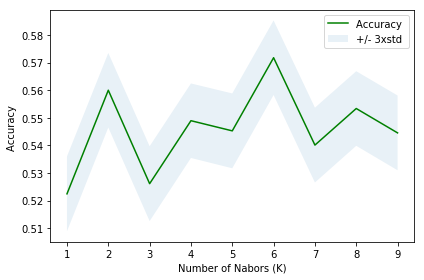

In [65]:
# Plot acc with different k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5717439293598234 with k= 6


In [67]:
# Train and Evaluate the model with the best k 
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.6154978833057243
Test set Accuracy:  0.5717439293598234


The KNN model reports an Accuracy of 0.5717.

In [68]:
#SVM
SVM_rbf = svm.SVC(kernel='rbf')
SVM_rbf.fit(X_train, y_train) 
yhat_SVM = SVM_rbf.predict(X_test)
yhat_SVM [0:5]

array(['HEAT/HOT WATER', 'HEAT/HOT WATER', 'HEAT/HOT WATER',
       'HEAT/HOT WATER', 'HEAT/HOT WATER'], dtype=object)

In [69]:
# Compute SVM Accuracy
print("The SVM model accuracy in the test set is ",accuracy_score(y_test, yhat_SVM))

The SVM model accuracy in the test set is  0.5673289183222958


The SVM Model has an Accuracy of 0.567.

In [70]:
# Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
yhat_lr[0:5]

array(['HEAT/HOT WATER', 'HEAT/HOT WATER', 'HEAT/HOT WATER',
       'HEAT/HOT WATER', 'HEAT/HOT WATER'], dtype=object)

In [71]:
# Logistic Regression
print("The Logistic Regression model accuracy in the test set is ",accuracy_score(y_test, yhat_lr))

The Logistic Regression model accuracy in the test set is  0.5724797645327446


The Logistic Regression Model had the highest accuracy in prediction which is 0.572.